<a href="https://colab.research.google.com/github/RobMaid4/RobMaid4/blob/main/LogisticRegression_FU_main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Statistics for Health - Lab 6 Solutions

In this lab session we are going to analyse a complicated dataset containing data from 303 individuals presenting heart disease symptoms. Our goal will be to explore the data and find key insights into heart disease that could be helpful for the medical community. We will then compare three classification models to decide which one best allows ud to classify individuals as with disease.

In [13]:
# Here we import necessary libraries for data manipulation, visualization, and modeling.

#Numpy an extremely useful module for manipulating arrays of numbers.
import numpy as np
#Pandas is a modle for handling tables of data.
import pandas as pd
#Matplotlib is a graph plotting library
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = 8,6
#Sci-kit learn function for splitting data into train and test sets
from sklearn.model_selection import train_test_split
#Sci-kit learn module for doing logistic regression
from sklearn.linear_model import LogisticRegression
#statsmodels is a very powerful package for statistical modeling, hypothesis testing, and data analysis
import statsmodels.api as sm
# Seaborn library for statistical data visualization
import seaborn as sns
# scikit-learn functions to evaluate classification model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# scikit-learn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# scikit-learn functions for preprocessing
from sklearn.preprocessing import StandardScaler
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## Load and display the data

In this lab we will use the dataset


We are going to use the following dataset:


**heart.csv**

* age - age of the person (in years)
* sex - gender of the person (1 = male; 0 = female)
* chest_pain_type - type of the chest pain
  * Value 0: typical angina
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: asymptomatic

* resting_bp - blood pressure while resting (in mm Hg on admission to the hospital)
* cholesterol - A person's serum cholesterol in mg/dl
* fasting_blood_sugar - Blood sugar while fasting & [ > 120 mg/dl ] (1 = true; 0 = false)
* restecg - ECG (electrocardiographic ) while resting
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* max_hr - Maximum heart rate achieved
* exang - exercise-induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
  * Value 0: upsloping
  * Value 1: flat
  * Value 2: downsloping

* num_major_vessels - no. of major vessels (0-3) colored by flourosopy
* thal - thalassemia
  * 0: normal
  * 1: fixed defect
  * 2: reversable defect
* Outcome FU -
 * 0 = disease
 * 1 = no disease

Let's load the data and understand what each column signifies.

In [3]:
#We first "mount" the google drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/NHS SWL ICB/PIFU MV regression data - unique patients - no ethnicity blanks.csv'

#Load the data into dataframes
df_heart = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's visualize the data

In [8]:
df_heart.head()

,Organisation_Name,First attendance,DNA,Booked Reason,SpecialityCode,Age,GenderCode,EthnicityCode,IMD_Score,Number of Comorbidities,AgeCat,Outcome,Outcome FU
0,2,1,5,Non-PIFU,6,43,1,3,1,.,3,2,1
1,2,1,5,Non-PIFU,5,52,1,5,1,6,3,2,1
2,2,1,5,Non-PIFU,3,60,1,7,1,.,4,2,1
3,1,1,5,Non-PIFU,6,38,1,9,1,1,2,2,1
4,2,1,5,Non-PIFU,7,48,1,3,1,.,3,2,1


In [4]:
X = df_heart.iloc[:,[0,1,6,7,8,10]]
y = df_heart['Outcome FU']

print("Train X & y:",X.shape, y.shape, X.columns)

Train X & y: (69628, 6) (69628,) Index(['Organisation_Name', 'First attendance', 'GenderCode', 'EthnicityCode',
       'IMD_Score', 'AgeCat'],
      dtype='object')


## Descriptive statistics

We can check if the dependent variable is well balanced so we that we don't need to take any steps to equalize the classes.

Outcome FU
1    52106
0    17958
Name: count, dtype: int64


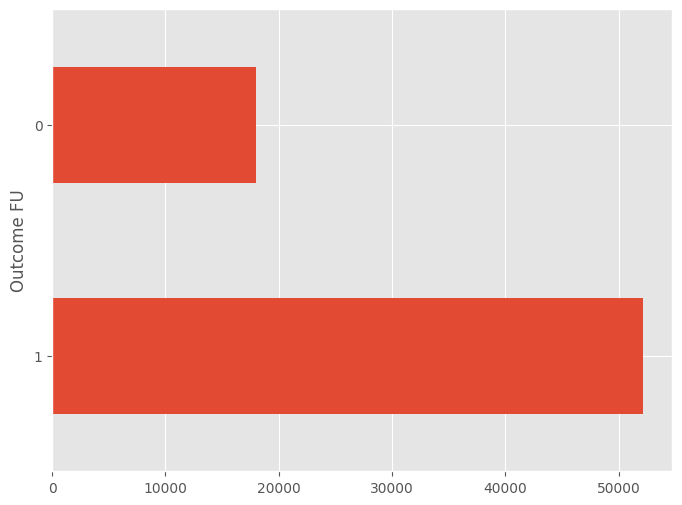

In [ ]:
print(y.value_counts())
ax = y.value_counts().plot.barh(grid=True)

The ideal case would be to have the same number of data points for each class, however the two classes are close enough.

Let's analyse the features in detail, in order to understand the type of data we are dealing with. In this stage, we should check the features one by one using various statistical measures and/or visualizations.
As part of the analysis, we can check
* Missing values
* Outlier values
* Distribution (skewness, etc.)
* Scales


In [40]:
print('No. of features:',len(X.columns),'\n',X.nunique().sort_values())

No. of features: 6 
 Organisation_Name     2
First attendance      2
GenderCode            2
IMD_Score             5
AgeCat                5
EthnicityCode        10
dtype: int64


All the columns have datatype int/float. However, the ones with lesser number of unique values can be considered categorical features.

### Numerical columns

Fort all continuous variables, we can understand the distribution (central tendency and spread).

Density plot, histogram, box plot,etc can be used for the visualization.

In [ ]:
columns = df_heart.columns[:-1]
print(columns)

Index(['Organisation_Name', 'First attendance', 'DNA', 'Booked Reason',
       'SpecialityCode', 'Age', 'GenderCode', 'EthnicityCode', 'IMD_Score',
       'Number of Comorbidities', 'AgeCat', 'Outcome'],
      dtype='object')


In [ ]:
num_cols = ["Age"]
print(len(num_cols),num_cols,sep='\n')

1
['Age']


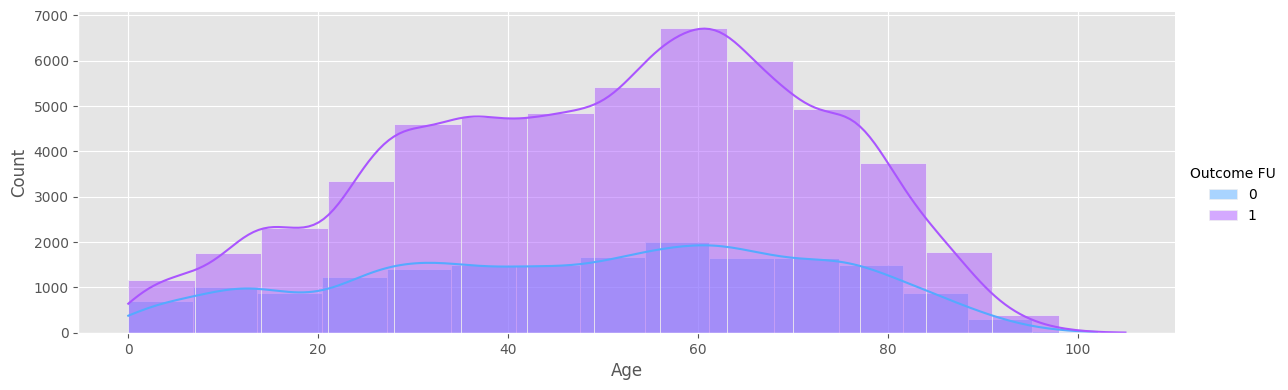

In [ ]:
for i, col in enumerate(num_cols, 1):
    g = sns.FacetGrid(df_heart, hue="Outcome FU", height=4, aspect=3, palette="cool")
    g.map(sns.histplot, col, kde=True, bins=15)
    g.add_legend()

plt.show()

In [ ]:
for i,col in enumerate(num_cols,1):
    print(col,'skewness :',round(X[col].skew(),2))

KeyError: 'Age'

We can observe skewness in oldpeak and cholesterol.

Let's now check for outliers.

In [ ]:
# Local figsize
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=X[num_cols],orient='h')

Outliers can be observed in oldpeak, resting_bp and cholesterol.  Also, we can see that the range of various numerical features are different so we could consider scaling them.

### Categorical columns

For categorical variables, frequency table can be used to understand distribution of each category.

We will measure Count and Count% against each category.

Bar chart, Count plot can be used for visualization.

In [ ]:
cat_cols = list( set(X.columns) - set(num_cols) )
print(len(cat_cols),cat_cols,sep='\n')

NameError: name 'num_cols' is not defined

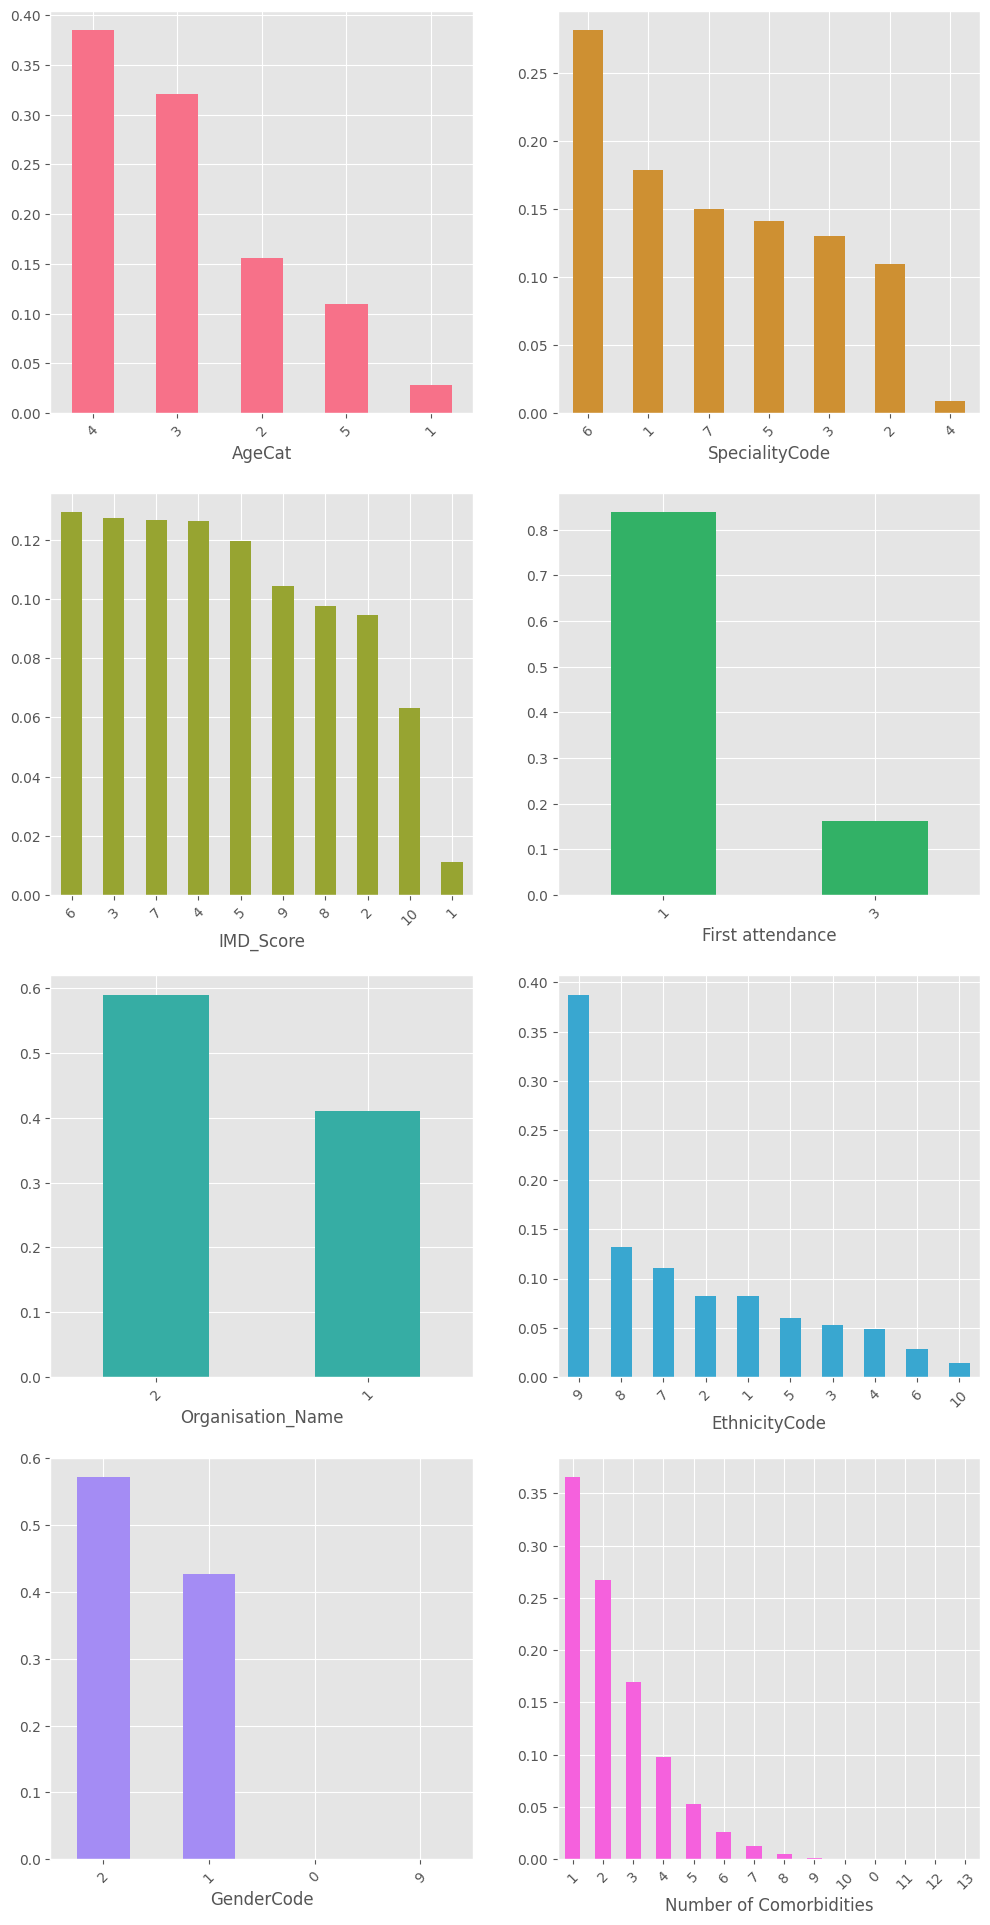

In [ ]:
plt.figure(figsize=(12,24))
colors = sns.color_palette("husl", len(cat_cols))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    X[col].value_counts(normalize=True).plot.bar(color=colors[i-1], rot=45)
    #plt.title(col)


Scatter plot of resting blood pressure and age

In [ ]:
import matplotlib.patches as mpatches  # For manually setting legend colors

In [ ]:
# Scatter plot of resting blood pressure (trestbps) and age
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_heart, x='age', y='resting_bp', hue=df_heart['Outcome FU'].astype(str),
                palette={'1': 'blue', '0': 'red'})

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Customizing labels and title
plt.title("Resting Blood Pressure and Age")
plt.xlabel("Age")
plt.ylabel("Resting BP")

# Legend
plt.legend(handles=[negative_patch, positive_patch], title="Heart Disease")

plt.show()


ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

Scatter plot of serum cholestoral and age

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_heart, x='age', y='cholesterol', hue=df_heart['Outcome FU'].astype(str),
                palette={'1': 'blue', '0': 'red'})

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Customizing labels and title
plt.title("Serum cholesterol and Age")
plt.xlabel("Age")
plt.ylabel("Serum cholesterol")

# Legend
plt.legend(handles=[negative_patch, positive_patch], title="Heart Disease")

plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

## Exercise: Produce a scatter plot for Max heart rate (max_hr) and age (Age)

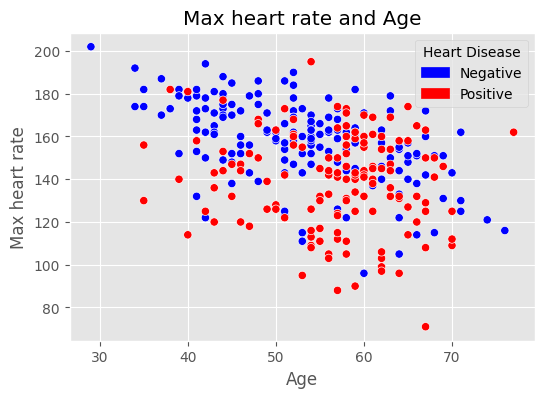

In [ ]:
plt.figure(figsize=(6, 4))

# Scatter plot with enforced colors
sns.scatterplot(data=df_heart, x='age', y='max_hr', hue=df_heart['Outcome FU'].astype(str),
                palette={'1': 'blue', '0': 'red'})

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Legend
plt.legend(handles=[negative_patch, positive_patch], title="Heart Disease")

# Plot titles and labels
plt.title("Max heart rate and Age")
plt.xlabel("Age")
plt.ylabel("Max heart rate")

plt.show()

Comment your findings: ...

**Remarks about the Last Three Graphs:**

- Maximum Heart Rate exhibited the most distinct separation between individuals with and without heart disease.  
- The majority of positive cases (those with heart disease) fall within the 55 to 70 age range.  
- There are very few positive cases beyond the age of 70. This may be due to a limited sample size or could indicate that individuals with heart disease rarely live beyond 70 years.  


Next, we will create a scatter plot to examine the relationship between maximum heart rate, age, and sex, where 0 represents females and 1 represents males.

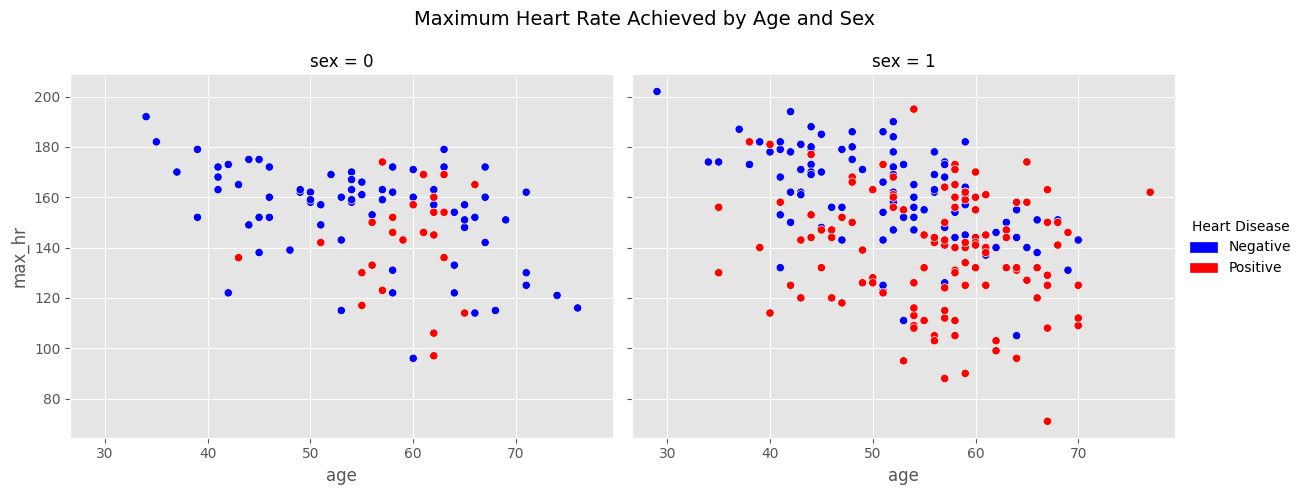

In [ ]:
# Create FacetGrid to split by sex
g = sns.FacetGrid(df_heart, col="sex", height=5, aspect=1.2)

# Scatter plot of Max Heart Rate (thal) vs Age, colored by heart disease status
g.map_dataframe(sns.scatterplot, x="age", y="max_hr", hue=df_heart['Outcome FU'].astype(str),
                palette={'1': 'blue', '0': 'red'})

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Legend and title
g.add_legend(handles=[negative_patch, positive_patch], title="Heart Disease")
g.fig.suptitle("Maximum Heart Rate Achieved by Age and Sex", fontsize=14)

# Adjust layout to prevent title overlap
plt.subplots_adjust(top=0.85)

plt.show()

**Remarks**:

- Only one female under the age of 50 is observed positive.
- The majority of male negative observations had max heart rate over 150.

### Exercise: Produce a scatter plot of maximum heart rate achieved (df_heart) vs cholesterol by sex

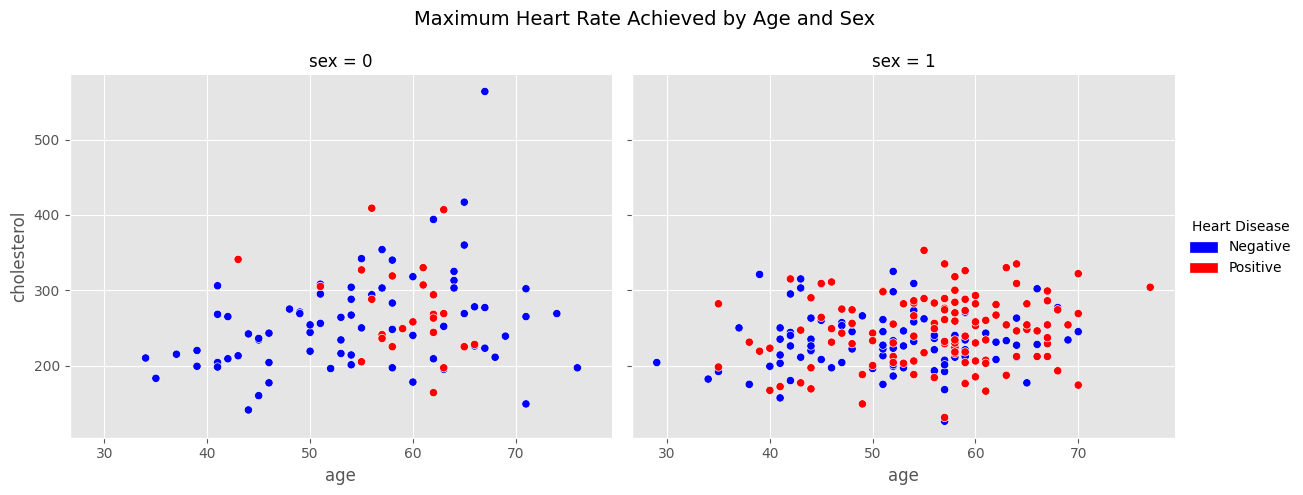

In [ ]:
# Create FacetGrid to split by sex
g = sns.FacetGrid(df_heart, col="sex", height=5, aspect=1.2)

# Scatter plot of Max Heart Rate (thal) vs Age, colored by heart disease status
g.map_dataframe(sns.scatterplot, x="age", y="cholesterol", hue=df_heart['Outcome FU'].astype(str),
                palette={'1': 'blue', '0': 'red'})

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Legend and title
g.add_legend(handles=[negative_patch, positive_patch], title="Heart Disease")
g.fig.suptitle("Maximum Heart Rate Achieved by Age and Sex", fontsize=14)

# Adjust layout to prevent title overlap
plt.subplots_adjust(top=0.85)

plt.show()

Comment:

To visualize differences in measurement of categorical variables between female and male we can use a bar chart. For example in the case of the number of major vessels (0-3), we can color them by flourosopy during exam split by Heart Disease diagnosis

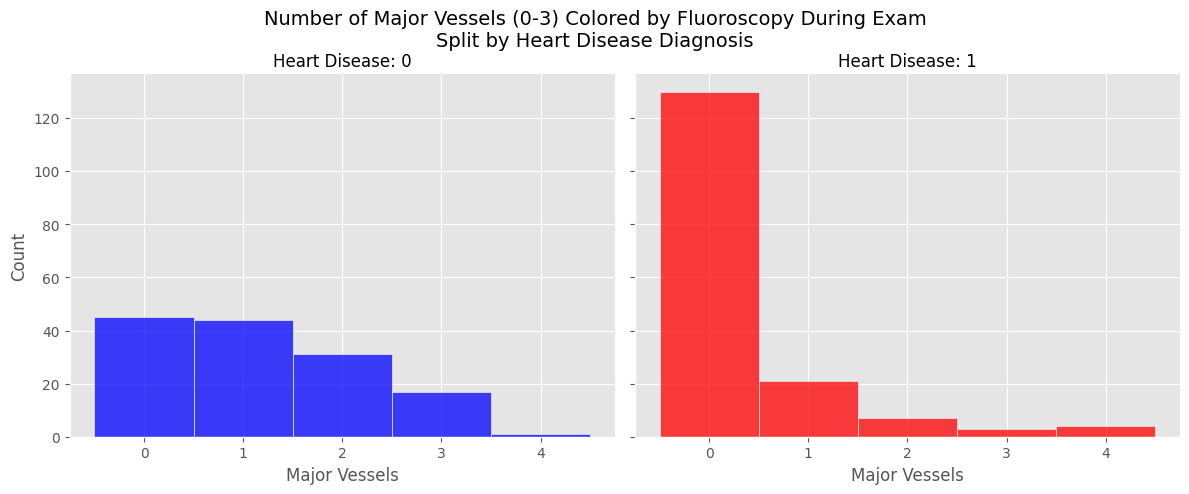

In [ ]:
# Create FacetGrid to split by heart disease diagnosis
g = sns.FacetGrid(df_heart, col="Outcome FU", height=5, aspect=1.2, sharey=True)

# Manually define legend patches to enforce correct colors
negative_patch = mpatches.Patch(color='blue', label="Negative")
positive_patch = mpatches.Patch(color='red', label="Positive")

# Create bar plot for the number of major vessels (ca) filled by heart disease status
g.map_dataframe(sns.histplot, x="num_major_vessels", hue=df_heart['Outcome FU'].astype(str), multiple="stack", palette={'0': 'blue', '1': 'red'}, discrete=True)

# Set plot labels and title
g.set_axis_labels("Major Vessels", "Count")
g.set_titles(col_template="Heart Disease: {col_name}")
g.fig.suptitle("Number of Major Vessels (0-3) Colored by Fluoroscopy During Exam\nSplit by Heart Disease Diagnosis", fontsize=14)

# Adjust layout to prevent title overlap
plt.subplots_adjust(top=0.85)

plt.show()

## Models

We will now run some discriminant analysis on the data, but before then we will split the dataset in train and test and standardise the numerical features.

## Preprocessing

In [5]:
df_dummy = pd.get_dummies(df_heart, columns=['Organisation_Name', 'First attendance', 'GenderCode', 'EthnicityCode', 'IMD_Score', 'AgeCat'], drop_first=False, dtype=int)

# 'Organisation_Name', 'First attendance', 'GenderCode', 'EthnicityCode', 'IMD_Score', 'AgeCat'

df_dummy.head()

,DNA,Booked Reason,SpecialityCode,Age,Number of Comorbidities,Outcome,Outcome FU,Organisation_Name_1,Organisation_Name_2,First attendance_1,...,IMD_Score_1,IMD_Score_2,IMD_Score_3,IMD_Score_4,IMD_Score_5,AgeCat_1,AgeCat_2,AgeCat_3,AgeCat_4,AgeCat_5
0,5,Non-PIFU,6,43,.,2,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1,5,Non-PIFU,5,52,6,2,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,5,Non-PIFU,3,60,.,2,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,5,Non-PIFU,6,38,1,2,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0
4,5,Non-PIFU,7,48,.,2,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [7]:
# Split data into training (80%) and testing (20%)
train_data, test_data = train_test_split(df_dummy, test_size=0.2, stratify=df_dummy['Outcome FU'], random_state=423)

# List of predictor columns
predictors = list(X.columns)

# Standardisation (centering & scaling of numerical features)
# scaler = StandardScaler()
# train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
# test_data[num_cols] = scaler.transform(test_data[num_cols])

X_train = train_data.drop(columns=['Booked Reason','Outcome FU','DNA','Age','Outcome','Organisation_Name_1', 'First attendance_1', 'SpecialityCode', 'GenderCode_1',
       'EthnicityCode_9', 'IMD_Score_5', 'Number of Comorbidities', 'AgeCat_3'])
X_test = test_data.drop(columns=['Booked Reason','Outcome FU','DNA','Age','Outcome','Organisation_Name_1', 'First attendance_1', 'SpecialityCode', 'GenderCode_1',
       'EthnicityCode_9', 'IMD_Score_5', 'Number of Comorbidities', 'AgeCat_3'])
#X_train = scaler.fit_transform(train_data.drop(columns=['Outcome FU']))  # Use all features except the Outcome FU
#X_test = scaler.transform(test_data.drop(columns=['Outcome FU']))


# Defining the response variable
y_train = train_data['Outcome FU']
y_test = test_data['Outcome FU']

X_train.head()
X_train.columns

Index(['Organisation_Name_2', 'First attendance_3', 'GenderCode_2',
       'EthnicityCode_1', 'EthnicityCode_2', 'EthnicityCode_3',
       'EthnicityCode_4', 'EthnicityCode_5', 'EthnicityCode_6',
       'EthnicityCode_7', 'EthnicityCode_8', 'EthnicityCode_10', 'IMD_Score_1',
       'IMD_Score_2', 'IMD_Score_3', 'IMD_Score_4', 'AgeCat_1', 'AgeCat_2',
       'AgeCat_4', 'AgeCat_5'],
      dtype='object')

#### Logistic regression

In [21]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_resampled, y_resampled = smo.fit_resample(X_train, y_train)

# Use Logit after resampling
X_resampled = sm.add_constant(X_resampled)
logit_model = sm.Logit(y_resampled, X_resampled)
result = logit_model.fit()
print(result.summary())
print(result.params.values,result.pvalues.values, result.conf_int().values)


Optimization terminated successfully.
         Current function value: 0.678433
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Outcome FU   No. Observations:                82816
Model:                          Logit   Df Residuals:                    82795
Method:                           MLE   Df Model:                           20
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                 0.02123
Time:                        10:08:32   Log-Likelihood:                -56185.
converged:                       True   LL-Null:                       -57404.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3812      0.026     14.550      0.000       0.330       0.433
Or

In [9]:
# # # Fit the logistic regression model
X_trainL = sm.add_constant(pd.DataFrame(X_train))
X_testL = sm.add_constant(pd.DataFrame(X_test))
# log_reg = sm.Logit(y_train, X_trainL)
# log_results = log_reg.fit()

# # Obtain full regression statistics
# print(log_results.summary())

# # Create predictions on the test set
# y_pred_log = log_results.predict(X_testL)
# # Convert probabilities to binary class labels (threshold = 0.5)
# y_pred_labels = (y_pred_log >= 0.5).astype(int)

# # Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_labels)
# accuracy = accuracy_score(y_test, y_pred_labels)
# report = classification_report(y_test, y_pred_labels)

# # Viewing accuracy results
# print("Confusion Matrix:\n", conf_matrix)
# print("\nAccuracy:", accuracy)
# print("\nClassification Report:\n", report)

# print(log_results.params.values, log_results.pvalues.values)


# weights = {0: 2.9, 1: 1}
weighted_lr_model = LogisticRegression(random_state=42, class_weight='balanced')
weighted_lr_model.fit(X_trainL, y_train)

# Make predictions with the weighted model
y_pred_weighted_lr = weighted_lr_model.predict(X_testL)

# Evaluate the weighted model
# # print(&quot;Weighted Logistic Regression:&quot;)
# print(classification_report(y_test, y_pred_weighted_lr))
print(weighted_lr_model.coef_)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_weighted_lr)
accuracy = accuracy_score(y_test, y_pred_weighted_lr)
report = classification_report(y_test, y_pred_weighted_lr)

# Viewing accuracy results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

# weighted_lr_model.summary()




[[ 0.24096026 -0.62685377  0.05164086 -0.05686319 -0.04722876 -0.00588651
   0.13972674  0.16698529  0.01901291 -0.01209742 -0.06598702  0.03249528
   0.08481289  0.0694566   0.05199454  0.0858635   0.08273067 -0.60892573
  -0.09696443 -0.04166082 -0.25967935]]
Confusion Matrix:
 [[2635  939]
 [6088 4264]]

Accuracy: 0.4954042797644693

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.74      0.43      3574
           1       0.82      0.41      0.55     10352

    accuracy                           0.50     13926
   macro avg       0.56      0.57      0.49     13926
weighted avg       0.69      0.50      0.52     13926



#### Linear discriminant analysis

### Exercise: Produce a liner discriminant model.

In [ ]:
# Fit the LDA model
lda_heart = LDA()
lda_heart.fit(X_train, y_train)

# Predict the response variable
y_pred = lda_heart.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Viewing accuracy results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)



Confusion Matrix:
 [[24  4]
 [ 3 30]]

Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



To visualize the classification rule we can visualize the LDA coefficients:

In [ ]:
# Get Fisher's function (LDA coefficients)
fisher_function = pd.DataFrame(lda_heart.coef_, columns=pd.DataFrame(X_train).columns, index=['LDA Function'])
print("Intercept (Bias Term):", lda_heart.intercept_)

print("Fisher's Linear Discriminant Function:")
print(fisher_function)


Intercept (Bias Term): [2.1777022]
Fisher's Linear Discriminant Function:
                   age       sex  chest_pain_type  resting_bp  cholesterol  \
LDA Function -0.134218 -1.605845         1.122043   -0.180135    -0.033924   

              fasting_blood_sugar  restecg    max_hr     exang   oldpeak  \
LDA Function             0.154019  0.34369  0.502903 -0.879621 -0.535451   

                 slope  num_major_vessels      thal  
LDA Function  0.751861          -0.760549 -0.972834  


So, the Fisher’s function is:
$$𝑌= 2.177702 -0.134218 \, \text{age} -1.605845\,  \text{sex} + 1.122043\,  \text{chest_pain_type}
-0.180135\,  \text{resting_bp} -0.033924\,  \text{cholesterol} + 0.154019\,  \text{fasting_blood_sugar}
+ 0.34369\,  \text{restecg} + 0.502903\,  \text{max_hr} -0.879621\,  \text{exang}
-0.535451\,  \text{oldpeak} + 0.751861\,  \text{slope} -0.760549\,  \text{num_major_vessels}
-0.972834\,  \text{thal}
$$

### Exercise: Write the linear classification rule.

**Y** > 0

#### K-NN model

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn.fit(X_train, y_train)

# Compute predicted values
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

predict_proba method gives the probabilities for the Outcome FU variable being 1 in an array form.

In [ ]:
# probability of getting output as 1 - disease

knn.predict_proba(X_test)[:,0]

array([0.5  , 0.875, 1.   , 0.125, 0.875, 0.125, 0.75 , 0.125, 0.125,
       1.   , 0.25 , 0.375, 0.25 , 0.875, 0.125, 1.   , 0.75 , 0.625,
       0.125, 0.25 , 0.125, 1.   , 0.125, 1.   , 0.375, 1.   , 0.   ,
       0.   , 0.5  , 0.875, 0.   , 0.25 , 0.25 , 1.   , 0.25 , 0.125,
       0.25 , 0.75 , 0.125, 0.125, 0.125, 0.875, 0.   , 0.   , 0.375,
       0.   , 0.   , 0.875, 0.125, 0.   , 0.875, 0.625, 0.5  , 0.   ,
       1.   , 0.875, 1.   , 0.625, 0.75 , 0.125, 0.875])

We can compute and print the model's accuracy score:

In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred)

print('Model accuracy score',accuracy_KNN)

Model accuracy score 0.8688524590163934


It is possible to search for the best K value using grid_search with cross validation:an "hyperparameter" tuning technique that systematically searches for the best combination of parameters for a machine learning model while ensuring reliable evaluation through cross-validation (The model is tested multiple times on different parts of the data).

Best K: 38


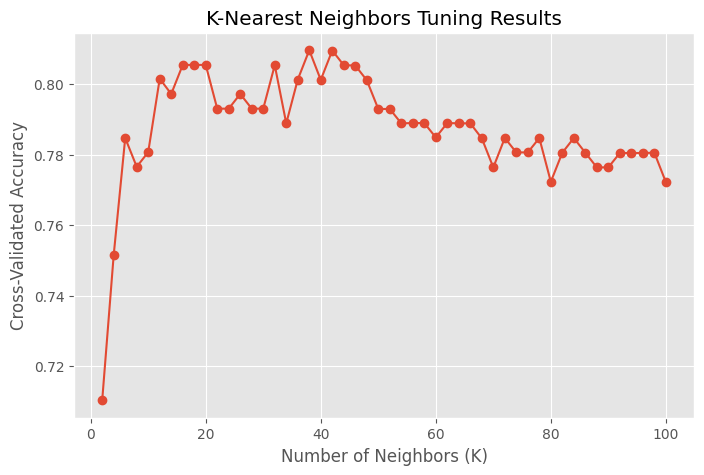

Confusion Matrix:
 [[21  7]
 [ 4 29]]

Accuracy: 0.819672131147541

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
# Setting the random seed for reproducibility
np.random.seed(7)

# Creating tuning parameter for K (equivalent to tuneGrid in R)
param_grid = {'n_neighbors': np.arange(2, 101, 2)}  # K values from 2 to 200 (step 2)

# Initializing the KNN model
knn = KNeighborsClassifier()

# Performing grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Finding the best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K: {best_k}")

# Plotting tuning results
results = grid_search.cv_results_
plt.figure(figsize=(8, 5))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("K-Nearest Neighbors Tuning Results")
plt.grid(True)
plt.show()

# Training the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Making predictions on the test set
knn_preds = best_knn.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_preds)
accuracy = accuracy_score(y_test, knn_preds)
report = classification_report(y_test, knn_preds)

# Viewing accuracy results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


### Exercise
Use the dataset `DA_Skulls.csv` and develop a K-NN model to classify individuals with diabetes based on the other measured features. Find the best k and compare to the LDA result.

In [ ]:
# Load dataset
df = pd.read_csv(path+'DA_Skulls.csv')

# Define features (X) and Outcome FU (y)
X = df.drop(columns=['Period'])  # Use all features except the Outcome FU
y = df['Period']  # Outcome FU variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Setting the random seed for reproducibility
np.random.seed(17)

# Creating tuning parameter for K (equivalent to tuneGrid in R)
param_grid = {'n_neighbors': np.arange(2, 50, 2)}  # K values from 2 to 200 (step 2)

# Initializing the KNN model
knn = KNeighborsClassifier()

# Performing grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Finding the best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best K: {best_k}")

# Plotting tuning results
results = grid_search.cv_results_
plt.figure(figsize=(8, 5))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("K-Nearest Neighbors Tuning Results")
plt.grid(True)
plt.show()

# Training the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Making predictions on the test set
knn_preds = best_knn.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_preds)
accuracy = accuracy_score(y_test, knn_preds)
report = classification_report(y_test, knn_preds)

# Viewing accuracy results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


Choosing k=46 the k-NN model achieves the same accuracy as LDA.